In [1]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Tue Jun 13 02:03:31 2023 child process killed(17)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import handcalcs.render
from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

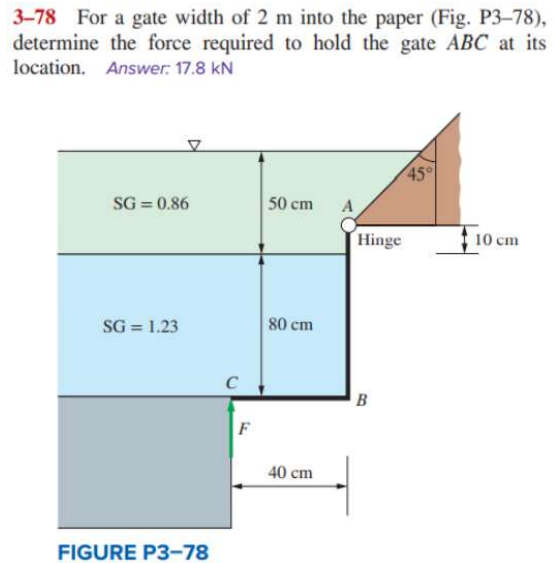
## Solution: 
With the geometry and specific gravities given, the force F required to hold the gate ABC at its location is to be determined.

## Assumptions : 
$SG_1$ = 0.86, $SG_2$ = 1.23, $H_1$ = 50 cm, $H_2$ = 80 cm, $H_a$ = 10 cm, $H_{cb} = 40$ cm, W = 2 m, and $\rho$ = 1000 $ \dfrac{kg}{m^3}$

"the hydrostatic force acting on a plane or curved surface submerged in a multilayered fluid of different densities can be determined by considering different parts of surfaces in different fluids as different surfaces, finding the force on each part, and then adding them using vector addition. Fr = sum of Fr,i = sum of Pc,i (A). where Pc,i = P0 + pgHc,i is the pressure at the centroid of the portion ofthe surface in fluid i and Ai is the area of the plate in that fluid. "

Therefore because it is a curved surfacewe must take into account the forces in the x and y direction. 

To create the same pressure in the second liquid, we will need to find the height .

Because there is a hinge at point A, there will be a moment or rotation at that point that must be in equilibrium for the location of the gate to hold.


In [2]:
%%render 

SG_1=0.86 #specific gravity of fluid 1
SG_2=1.23 #specific gravity of fluid 2
H_1=50*u.cm #Height of fluid 1
H_2=80*u.cm #Height of fluid 2
H_a=10*u.cm #Height of gate from A to B
H_cb=40*u.cm #Height of gate from B to C
W=2*u.m #Width of gate
rho=1000*(u.kg/(u.m**3)) 
g=9.81*u.m/u.s**2

<IPython.core.display.Latex object>

## Analysis : 
We can start by finding the pressure in the first liquid.

In [5]:
%%render

P = SG_1*g*rho*H_1

<IPython.core.display.Latex object>

In [6]:
print(P.to('Pa')) 

4218.3 pascal


Next, find how much fluid from the second layer can make the same pressure.

In [9]:
%%render
h_2 = P / (SG_2*rho*g)

<IPython.core.display.Latex object>

Next, simplify the problem

In [10]:
%%render long
H_c = ((H_2+H_a)/2) + (h_2-H_a)
A_ab = (H_a+H_2)*W
F_x = SG_2*rho*H_c*g*A_ab
H_t = H_2+h_2
A_cb = H_cb*W
F_y = SG_2*rho*g*H_t*A_cb
Y_ab = (H_2+H_a)/2
I_xxc = (W*((H_2+H_a)**3))/12
Y_c = Y_ab + (I_xxc/(Y_ab*A_ab))

<IPython.core.display.Latex object>

Sum of moment about the hinge: M = 0.

$M=F(H_{cb}) - F_x(Y_c) + F_y(\dfrac{H_{cb}}{2}) = 0$

Solve this to find force $F_{final}$

In [5]:
%%render
F_final = ((F_x*Y_c) - ((F_y)*(H_cb/2)))/ H_cb

<IPython.core.display.Latex object>

In [6]:
print(F_final.to('N')) 
#this conversion of units must be in a cell separate from render, otherwise it leads to errors in cells

17243.52750000001 newton


## Discussion: 
Using the geometry given as well as the specific gravities, and hydrostatic equation, the force required to hold the gate ABC at its location is 17243.527 Newtons